### Теория вероятностей и математическая статистика
##### Курсовой проект

Тема: Исследование данных о заработной плате в сфере Data Science и STEM (science, technology, engineering и mathematics). Датасет взят с сайта kaggle.com, а данные для него с сайта fyi.com.

Предстоит сделать:<br>
• Разведочный анализ (EDA – exploratory data analysis)<br>
• Проверка статистической гипотезы<br>
• Корреляционный анализ<br>
• Регрессионный анализ<br>
• Дисперсионный анализ<br>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 50)
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import f_oneway
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Levels_Fyi_Salary_Data.csv')
df

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,20000.0,10000.0,NaN,NaN,7392,807.0,1,0,0,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7419,807.0,2,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,0.0,0.0,NaN,NaN,11527,819.0,3,0,0,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,180000.0,35000.0,NaN,NaN,7472,807.0,7,0,0,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,0.0,0.0,NaN,NaN,7322,807.0,9,0,0,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62637,9/9/2018 11:52:32,Google,T4,Software Engineer,327000,"Seattle, WA",10.0,1.0,Distributed Systems (Back-End),155000.0,150000.0,22000.0,NaN,NaN,11527,819.0,1973,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62638,9/13/2018 8:23:32,Microsoft,62,Software Engineer,237000,"Redmond, WA",2.0,2.0,Full Stack,146900.0,73200.0,16000.0,NaN,NaN,11521,819.0,2037,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62639,9/13/2018 14:35:59,MSFT,63,Software Engineer,220000,"Seattle, WA",14.0,12.0,Full Stack,157000.0,25000.0,20000.0,NaN,NaN,11527,819.0,2044,0,0,0,0,0,0,0,0,0,0,NaN,NaN
62640,9/16/2018 16:10:35,Salesforce,Lead MTS,Software Engineer,280000,"San Francisco, CA",8.0,4.0,iOS,194688.0,57000.0,29000.0,NaN,NaN,7419,807.0,2097,0,0,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Описание столбцов:<br>
    1. <b>timestamp</b> - время, когда зафиксированы данные<br>
    2. <b>company</b> - компания, в которой работает сотрудник<br>
    3. <b>level</b> - профессиональный уровень<br>
    4. <b>title</b> - название должности<br>
    5. <b>totalyearlycompensation</b> - общий доход за год<br>
    6. <b>location</b> - место работы (город)<br>
    7. <b>yearsofexperience</b> - трудовой стаж<br>
    8. <b>yearsatcompany</b> - стаж работы в компании<br>
    9. <b>tag</b> - метка(тэг)<br>
    10. <b>basesalary</b> - начальный оклад<br>
    11. <b>stockgrantvalue</b> - фондовые гранты<br>
    12. <b>bonus</b> - бонус(премия)<br>
    13. <b>gender</b> - пол<br>
    14. <b>otherdetails</b> - другие детали<br>
    15. <b>cityid</b> - id города<br>
    16. <b>dmaid</b> - не понятно, что это значит<br>
    17. <b>rowNumber</b> - номер строки<br>
    18-27. <b>Masters_Degree,	Bachelors_Degree,	Doctorate_Degree,	Highschool,	Some_College,	Race_Asian,	Race_White,	Race_Two_Or_More,	Race_Black,	Race_Hispanic</b> - дамми-переменные, показывающие образование и расу<br>
    28. <b>Race</b> - раса<br>
    29. <b>Education</b> - образование<br>

Так как нас не особо будут интересовать конкретные даты, то заменим их на годы.

In [4]:
years = ['2017', '2018', '2019', '2020', '2021']
for i in years:
    df.loc[(df['timestamp'].str.contains(i)), 'timestamp'] = i

df['timestamp'].value_counts()

2020    23946
2021    23427
2019    11189
2018     3895
2017      185
Name: timestamp, dtype: int64

# EDA

Построим "ящик с усами" для столбца 'totalyearlycompensation' чтобы увидеть выбросы

In [5]:
df['totalyearlycompensation'].describe()

count    6.264200e+04
mean     2.163004e+05
std      1.380337e+05
min      1.000000e+04
25%      1.350000e+05
50%      1.880000e+05
75%      2.640000e+05
max      4.980000e+06
Name: totalyearlycompensation, dtype: float64

<AxesSubplot:>

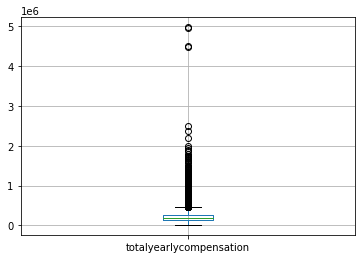

In [6]:
df[['totalyearlycompensation']].boxplot()

Как видно, большое количество данных лежит за пределом верхнего уса, что говорит о высоких зарплатах, сосредоточенных в четвертом квантиле. Вопрос вызывают значения в районе 4,5 и 5. Посмотрим на эти строки поближе:

In [7]:
df.loc[df['totalyearlycompensation']>4000000]

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,stockgrantvalue,bonus,gender,otherdetails,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
61967,2019,Microsoft,80,Software Engineering Manager,4950000,"Redmond, WA",24.0,8.0,ML / AI,850000.0,3750.0,350000.0,Male,This information is public and can be viewed o...,11521,819.0,13451,0,0,0,0,0,0,0,0,0,0,NaN,NaN
61982,2021,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000.0,3700.0,350000.0,Male,"Title: Vp, Race: Asian, Academic Level: Master...",7419,807.0,60795,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree
61990,2021,Facebook,E9,Software Engineer,4490000,"Menlo Park, CA",13.0,9.0,Full Stack,350000.0,4000.0,140000.0,NaN,Title: Software Engineer,7300,807.0,76521,0,0,0,0,0,0,0,0,0,0,NaN,NaN
61991,2021,Facebook,E9,Product Manager,4980000,"Menlo Park, CA",17.0,0.0,Product,380000.0,4400.0,200000.0,Male,"Title: Senior Product Manager, Race: Asian, Ac...",7300,807.0,80747,1,0,0,0,0,1,0,0,0,0,Asian,Master's Degree


Если сложить basesalary, stockgrantvalue и bonus, то не получается значение totalyearlycompensation. Будем считать эти наблюдения выбросами и удалим их.

In [8]:
df = df.loc[df['totalyearlycompensation'] < 4000000]

Text(0.5, 0, 'totalyearlycompensation')

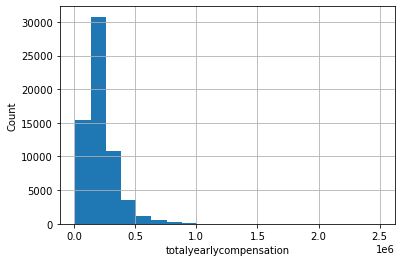

In [9]:
df['totalyearlycompensation'].hist(bins=20)
plt.ylabel('Count')
plt.xlabel('totalyearlycompensation')

На гистограмме видно, что уровень дохода не имеет нормального распределения. Примерно половина наблюдений имеет доход в пределах 125-250 тысяч USD, еще четверть наблюдений зарабатывает до 125 тыс USD.

# Проверка статистической гипотезы
###### Или "убить двух зайцев" одним примером

Проверим статистическую гипотезу<br>
    1. H0 - средний доход с каждым годом остается неизменным.<br>
       H1 - средний доход с каждым годом меняется.<br>

In [10]:
# Соберем выборки по годам
# Для начала разобъем датафрейм на куски по годам
df_17 = df.loc[df['timestamp'] == '2017']
df_18 = df.loc[df['timestamp'] == '2018']
df_19 = df.loc[df['timestamp'] == '2019']
df_20 = df.loc[df['timestamp'] == '2020']
df_21 = df.loc[df['timestamp'] == '2021']
df_17.shape[0], df_18.shape[0], df_19.shape[0], df_20.shape[0], df_21.shape[0]

(185, 3895, 11188, 23946, 23424)

In [11]:
# Теперь сформируем массивы зарплат по годам
salary_17 = np.array(df_17['totalyearlycompensation'])
salary_18 = np.array(df_18['totalyearlycompensation'])
salary_19 = np.array(df_19['totalyearlycompensation'])
salary_20 = np.array(df_20['totalyearlycompensation'])
salary_21 = np.array(df_21['totalyearlycompensation'])

Воспользуемся дисперсионным анализом для проверки гипотезы о равенстве средних:

In [12]:
f_oneway(salary_17, salary_18, salary_19, salary_20, salary_21)

F_onewayResult(statistic=132.21968562525313, pvalue=1.1427050380657284e-112)

Значение Т-статистики больше p-значения, таким образом нулевая гипотеза о равенстве среднего дохода каждый год отвергается.

Вообще, из этих данных можно выжать больше информации, проверить другие стат.гипотезы... Но, как-нибудь в другой раз

# Корреляционный анализ

Проверим влияние признаков 'yearsofexperience' и 'yearsatcompany' на признак 'totalyearlycompensation'

In [13]:
df[['yearsofexperience', 'yearsatcompany', 'totalyearlycompensation']].corr()

,yearsofexperience,yearsatcompany,totalyearlycompensation
yearsofexperience,1.000000,0.522557,0.433982
yearsatcompany,0.522557,1.000000,0.168600
totalyearlycompensation,0.433982,0.168600,1.000000


Коэффициент корреляции между общим стажем ('yearsofexperience') и годовым доходом ('totalyearlycompensation') равен 0.433982, что не говорит о сильной взаимосвязи.<br>
Коэффициент корреляции между стажем в компании ('yearsatcompany') и годовым доходом ('totalyearlycompensation') равен 0.168600, что говорит, практически, об отсутствии взаимосвязи.<br>
Таким образом можно сделать вывод, что стаж не оказывает особого влияния на годовой доход.

А теперь проверим влияние признаков 'yearsofexperience' и 'yearsatcompany' на признак 'basesalary'

In [14]:
df[['yearsofexperience', 'yearsatcompany', 'basesalary']].corr()

,yearsofexperience,yearsatcompany,basesalary
yearsofexperience,1.000000,0.522557,0.374179
yearsatcompany,0.522557,1.000000,0.145199
basesalary,0.374179,0.145199,1.000000


Коэффициент корреляции между общим стажем ('yearsofexperience') и окладом ('basesalary') равен 0.374179, что говорит о довольно слабой взаимосвязи.
Коэффициент корреляции между стажем в компании ('yearsatcompany') и окладом ('basesalary') равен 0.145199, что говорит, практически, об отсутствии взаимосвязи.
Таким образом можно сделать вывод, что стаж не оказывает сильного влияния доход. Возможно, оказывают влияния достижения и профессиональный уровень.

# Регрессионный анализ

Вот теперь поподробнее поработаем с данными и избавимся от ненужных.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62638 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62638 non-null  object 
 1   company                  62633 non-null  object 
 2   level                    62519 non-null  object 
 3   title                    62638 non-null  object 
 4   totalyearlycompensation  62638 non-null  int64  
 5   location                 62638 non-null  object 
 6   yearsofexperience        62638 non-null  float64
 7   yearsatcompany           62638 non-null  float64
 8   tag                      61784 non-null  object 
 9   basesalary               62638 non-null  float64
 10  stockgrantvalue          62638 non-null  float64
 11  bonus                    62638 non-null  float64
 12  gender                   43099 non-null  object 
 13  otherdetails             40133 non-null  object 
 14  cityid                

In [16]:
# Заполним dmaid модой
df['dmaid'].fillna(df['dmaid'].mode, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [17]:
# Заполним company модой
df['company'].fillna(df['company'].mode, inplace=True)

In [18]:
# Заполним level модой
df['level'].fillna(df['level'].mode, inplace=True)

In [19]:
# Удалим столбцы tag и otherdetails за ненадобностью
df = df.drop('tag', 1)
df = df.drop('otherdetails', 1)

In [20]:
# Столбцы с пропусками gender, Race и Education тоже удалим, так как количество пропусков довольно большое 
# и заполнение может привести к некорректным результатам. Пусть в этом случае данные о наших специалистах будут обезличенными,
# без привязки к полу, а расу и образование заменят дамми-переменные.
df = df.drop('gender', 1)
df = df.drop('Race', 1)
df = df.drop('Education', 1) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62638 entries, 0 to 62641
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62638 non-null  object 
 1   company                  62638 non-null  object 
 2   level                    62638 non-null  object 
 3   title                    62638 non-null  object 
 4   totalyearlycompensation  62638 non-null  int64  
 5   location                 62638 non-null  object 
 6   yearsofexperience        62638 non-null  float64
 7   yearsatcompany           62638 non-null  float64
 8   basesalary               62638 non-null  float64
 9   stockgrantvalue          62638 non-null  float64
 10  bonus                    62638 non-null  float64
 11  cityid                   62638 non-null  int64  
 12  dmaid                    62638 non-null  object 
 13  rowNumber                62638 non-null  int64  
 14  Masters_Degree        

От пропусков избавились, теперь нормализуем данные в столбце 'cityid', чтобы эти значения не оказывали влияния на линейную регрессию.

In [22]:
# Выделяем столбец 'cityid', добавляем единички для свободного коэффициента, а заодно чтобы MinMaxScaler не ругался
df_city = df['cityid'].values
ones = np.ones((df_city.shape[0]))
df_city = np.vstack((ones, df_city))
df_city = df_city.transpose()

scaler = preprocessing.MinMaxScaler()
df_city = scaler.fit_transform(df_city)

# После нормализации единицы обратились в нули, вернем на место
for i in df_city:
    i[0] = 1
df_city

array([[1.        , 0.15423778],
       [1.        , 0.15480115],
       [1.        , 0.24051663],
       ...,
       [1.        , 0.24051663],
       [1.        , 0.15480115],
       [1.        , 0.15590702]])

In [23]:
# Создадим датафрейм только с числовыми признаками, а потом отправим его на съедение линейной регрессии
df_lr = pd.DataFrame(df_city)
df = df.drop(['cityid'], axis=1)
df = df.reset_index(drop = True)
df_lr = pd.concat([df_lr, df.select_dtypes(['number'])], axis = 1)
df_lr

,0,1,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
0,1.0,0.154238,127000,1.5,1.5,107000.0,20000.0,10000.0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,0.154801,100000,5.0,3.0,0.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0
2,1.0,0.240517,310000,8.0,0.0,155000.0,0.0,0.0,3,0,0,0,0,0,0,0,0,0,0
3,1.0,0.155907,372000,7.0,5.0,157000.0,180000.0,35000.0,7,0,0,0,0,0,0,0,0,0,0
4,1.0,0.152777,157000,5.0,3.0,0.0,0.0,0.0,9,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62633,1.0,0.240517,327000,10.0,1.0,155000.0,150000.0,22000.0,1973,0,0,0,0,0,0,0,0,0,0
62634,1.0,0.240391,237000,2.0,2.0,146900.0,73200.0,16000.0,2037,0,0,0,0,0,0,0,0,0,0
62635,1.0,0.240517,220000,14.0,12.0,157000.0,25000.0,20000.0,2044,0,0,0,0,0,0,0,0,0,0
62636,1.0,0.154801,280000,8.0,4.0,194688.0,57000.0,29000.0,2097,0,0,0,0,0,0,0,0,0,0


In [26]:
# Разделяем признаки и целевую переменную
y = df_lr['totalyearlycompensation']
x = df_lr.drop(['totalyearlycompensation'], axis=1)
x.columns.tolist()

[0,
 1,
 'yearsofexperience',
 'yearsatcompany',
 'basesalary',
 'stockgrantvalue',
 'bonus',
 'rowNumber',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic']

In [25]:
# Учим модель думать
model = LinearRegression().fit(x, y)
model.intercept_, model.coef_

(66970.18139463634,
 array([ 0.00000000e+00, -2.33850384e+04,  2.42505706e+03, -1.47197416e+02,
         6.43817697e-01,  9.33693361e-01,  9.94185837e-01, -3.66203771e-01,
        -7.95681605e+03, -1.05111764e+04,  4.93286473e+03, -1.35480606e+04,
        -1.37895371e+04,  2.37733431e+03,  2.08707954e+03,  4.98370650e+03,
         5.93451504e+03,  6.56843998e+02]))

In [28]:
# В этом блоке объединяем названия признаков и их коэффициенты влияния, чтобы наглядно видеть
coeff = np.vstack((x.columns.tolist(), model.coef_))
coeff = coeff.transpose()
coeff

array([['0', '0.0'],
       ['1', '-23385.038427519106'],
       ['yearsofexperience', '2425.057059542559'],
       ['yearsatcompany', '-147.1974163509733'],
       ['basesalary', '0.6438176973369991'],
       ['stockgrantvalue', '0.9336933608647087'],
       ['bonus', '0.9941858374945696'],
       ['rowNumber', '-0.3662037708254502'],
       ['Masters_Degree', '-7956.8160457410495'],
       ['Bachelors_Degree', '-10511.176359436313'],
       ['Doctorate_Degree', '4932.864729890657'],
       ['Highschool', '-13548.06062162082'],
       ['Some_College', '-13789.537058033518'],
       ['Race_Asian', '2377.334309085422'],
       ['Race_White', '2087.0795353676876'],
       ['Race_Two_Or_More', '4983.706497145157'],
       ['Race_Black', '5934.515038040626'],
       ['Race_Hispanic', '656.8439977196223']], dtype='<U32')

И что же мы видим? Больше всего на увеличение дохода влияют следующие признаки: 'yearsofexperience' и 'Doctorate_Degree'. Афроамериканцы и потомки от смешанных браков получат больше, нежели белокожие, азиаты или латинос. Образование: Если не доктор наук, то все остальные варианты работают только на понижение дохода. Ну и 'cityid'... если позиция города в конце списка - это тоже сказывается отрицательно. 